# Regression using Keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

sns.set_style()
sns.set_theme()

drive.mount('/drive')

sns.mpl.rcParams['figure.figsize'] = (12, 8)

Mounted at /drive


In [2]:
df = pd.read_csv("/drive/My Drive/Colab Notebooks/Deep Learning Course (Jose Portilia)/4. Basic Artificial Neural Networks - ANNs/kc_house_data.csv")

## Exploratory Data Analysis -- Part 1

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


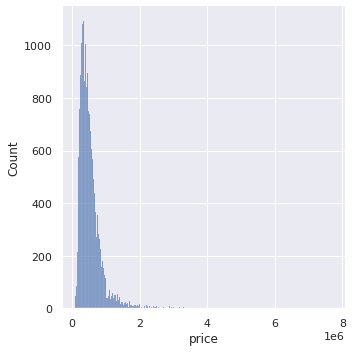

In [6]:
sns.displot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


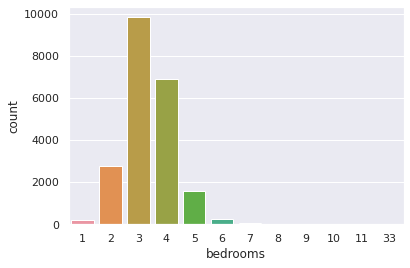

In [7]:
sns.countplot(df['bedrooms'])

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

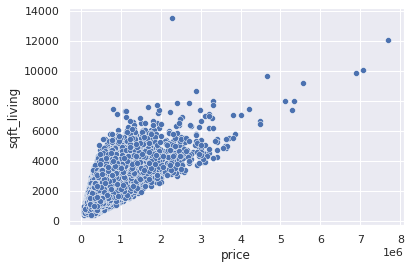

In [9]:
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)

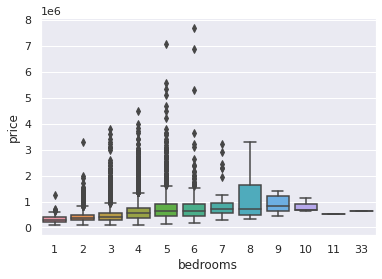

In [10]:
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

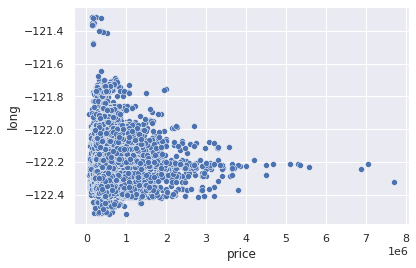

In [12]:
sns.scatterplot(x = 'price', y = 'long', data = df)

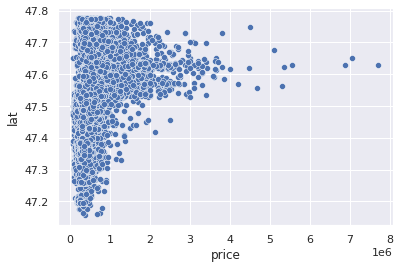

In [13]:
sns.scatterplot(x = 'price', y = 'lat', data = df)

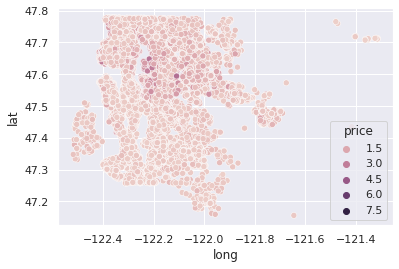

In [14]:
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price')

### Removing Some Outliers

In [15]:
df.sort_values("price", ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
len(df)*0.01

215.97

In [17]:
non_top_1_perc = df.sort_values('price', ascending = False).iloc[216:]

In [18]:
non_top_1_perc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


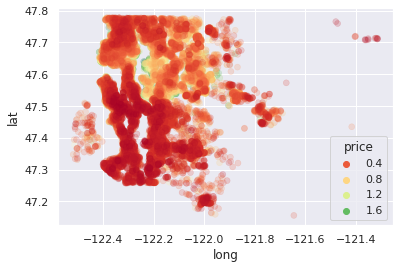

In [19]:
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_perc, hue = 'price', edgecolor = None, alpha = 0.2, palette = 'RdYlGn')

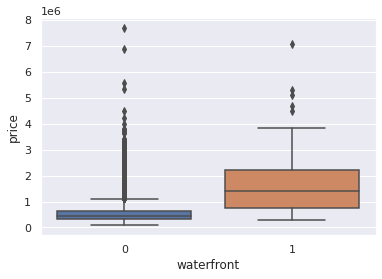

In [20]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

## Exploratory Data Analysis -- Part 2

**Feature Engineering Process**

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df = df.drop('id', axis = 1)

In [23]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [24]:
df['date'] = pd.to_datetime(df['date'])

In [25]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [26]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


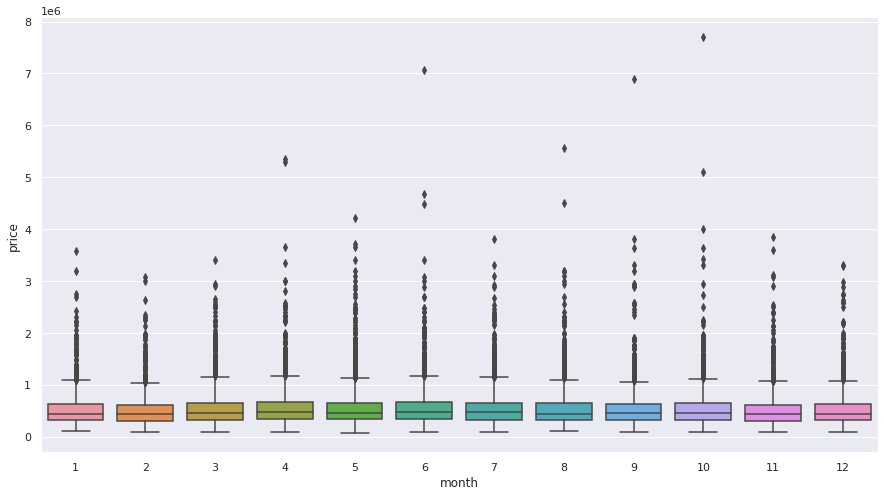

In [28]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'month', y = 'price', data = df)

In [29]:
df.groupby(by = 'month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

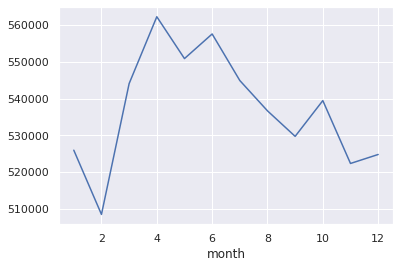

In [30]:
df.groupby(by = 'month').mean()['price'].plot()

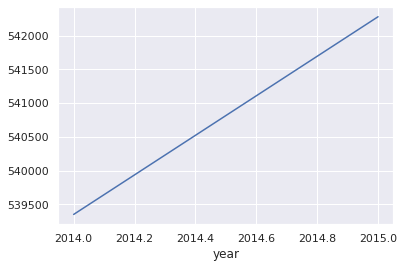

In [31]:
df.groupby(by = 'year').mean()['price'].plot()

In [32]:
df = df.drop('date', axis = 1)

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [34]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [35]:
df = df.drop('zipcode', axis = 1)

In [36]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [37]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Data Preprocessing and Creating a Model

In [38]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [44]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 429366607872.0000 - val_loss: 420956012544.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428309872640.0000 - val_loss: 417228521472.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 413275160576.0000 - val_loss: 382642094080.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 339673907200.0000 - val_loss: 262532235264.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 191933235200.0000 - val_loss: 120830214144.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 107948507136.0000 - val_loss: 95616966656.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 100418134016.0000 - val_loss: 93963616256.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 98806964224.0000 - val_loss: 92336652288.0000
Epoch 9/400
119/119 

## Model Evaluation and Predictions

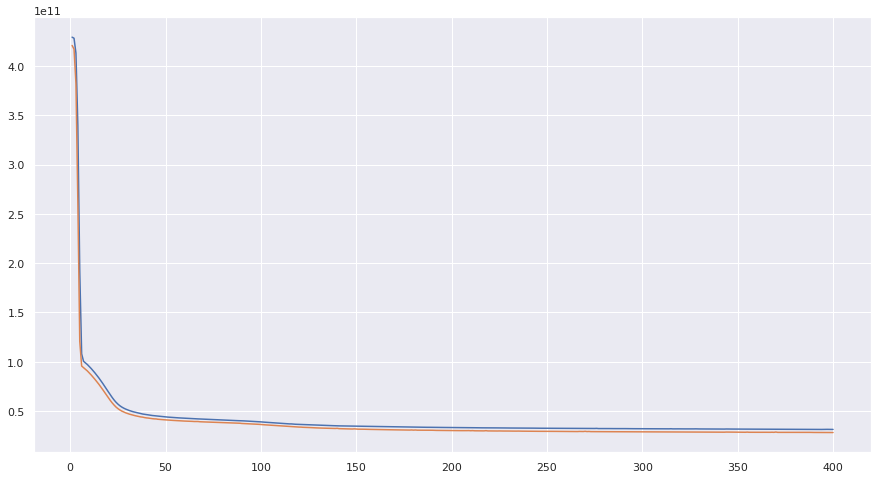

In [45]:
plt.figure(figsize = (15, 8))

sns.lineplot(x = range(1, 401), y = model.history.history['loss'])

sns.lineplot(x = range(1, 401), y = model.history.history['val_loss'])

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [47]:
predictions = model.predict(X_test)

In [48]:
mean_squared_error(y_test, predictions)

28135840542.39338

In [49]:
np.sqrt(mean_squared_error(y_test, predictions)) # rmse

167737.41545163197

In [50]:
mean_absolute_error(y_test, predictions)

106628.06265251254

In [51]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [52]:
5.402966e+05

540296.6

In [53]:
explained_variance_score(y_test, predictions)

0.7835858339382962

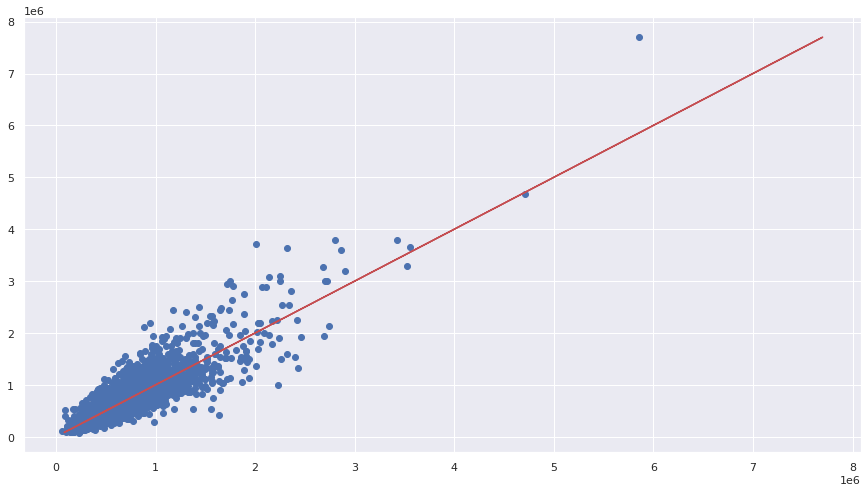

In [54]:
plt.figure(figsize = (15, 8))
plt.scatter(x = predictions, y = y_test)
plt.plot(y_test, y_test, color = 'r')

**Predict on brand new House**

In [55]:
single_house = df.drop('price', axis = 1).iloc[0]

In [56]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

**Correcting its shape, it rows but features are in columns**

In [57]:
scaler.transform(single_house.values.reshape(1, -1))

array([[0.0625    , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00574235, 0.        , 0.81818182]])

In [58]:
single_house = scaler.transform(single_house.values.reshape(1, -1))

In [59]:
model.predict(single_house)

array([[281076.06]], dtype=float32)

In [60]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


##Some Experiments By removing Some Data

In [61]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [62]:
j = 0.90
for i in range(0 ,11):
  # print(j + "th quantile is " + np.quantile(df['price'], j + 0.01))
  print("{}th quantile is {}".format(j, np.quantile(df['price'], j)))
  j = j + 0.01

0.9th quantile is 887000.0
0.91th quantile is 919993.6
0.92th quantile is 950000.0
0.93th quantile is 997964.0000000002
0.9400000000000001th quantile is 1060000.0
0.9500000000000001th quantile is 1160000.0
0.9600000000000001th quantile is 1260000.0
0.9700000000000001th quantile is 1390000.0
0.9800000000000001th quantile is 1600000.0
0.9900000000000001th quantile is 1970000.0
1.0th quantile is 7700000.0


### Removing Top 3 Percent

In [63]:
quantile_99_price = df[df['price'] < np.quantile(df['price'], 0.99)]

X = quantile_99_price.drop('price', axis = 1).values
y = quantile_99_price['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 400)


Epoch 1/400
117/117 [==============================] - 1s 3ms/step - loss: 348695101440.0000 - val_loss: 352078757888.0000
Epoch 2/400
117/117 [==============================] - 0s 2ms/step - loss: 348063105024.0000 - val_loss: 349860560896.0000
Epoch 3/400
117/117 [==============================] - 0s 1ms/step - loss: 338850742272.0000 - val_loss: 328147173376.0000
Epoch 4/400
117/117 [==============================] - 0s 2ms/step - loss: 291019030528.0000 - val_loss: 245985378304.0000
Epoch 5/400
117/117 [==============================] - 0s 2ms/step - loss: 176893280256.0000 - val_loss: 112928964608.0000
Epoch 6/400
117/117 [==============================] - 0s 2ms/step - loss: 74344579072.0000 - val_loss: 58305961984.0000
Epoch 7/400
117/117 [==============================] - 0s 2ms/step - loss: 54348496896.0000 - val_loss: 55640973312.0000
Epoch 8/400
117/117 [==============================] - 0s 2ms/step - loss: 53172125696.0000 - val_loss: 54827356160.0000
Epoch 9/400
117/117 [=

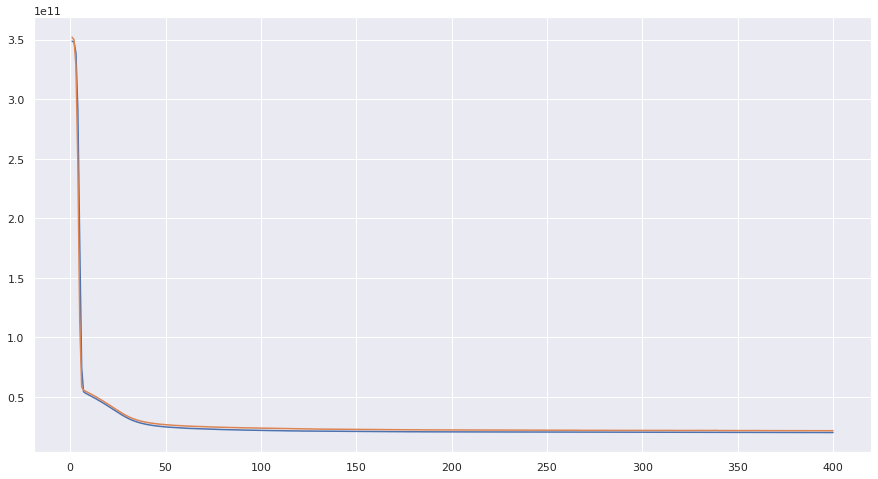

In [64]:
plt.figure(figsize = (15, 8))

sns.lineplot(x = range(1, 401), y = model.history.history['loss'])

sns.lineplot(x = range(1, 401), y = model.history.history['val_loss'])

In [65]:
preds_for_top_1_quantile = model.predict(X_test)


print("MAE: " + mean_absolute_error(y_test, preds_for_top_1_quantile))



98567.56142934402

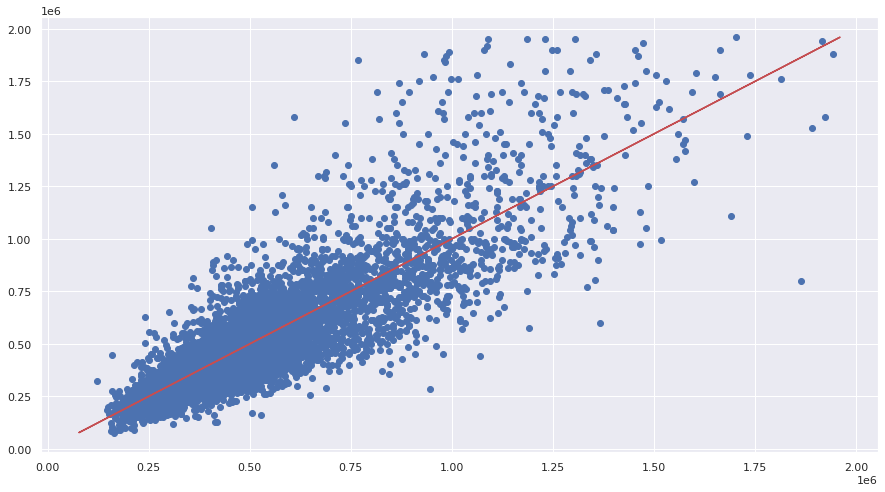

In [66]:
plt.figure(figsize = (15, 8))
plt.scatter(x = preds_for_top_1_quantile, y = y_test)
plt.plot(y_test, y_test, color = 'r')

In [67]:
explained_variance_score(y_test, preds_for_top_1_quantile)

0.7400892842621636

In [69]:
single_house = df.drop('price', axis = 1).iloc[0]

single_house = scaler.transform(single_house.values.reshape(1, -1))

model.predict(single_house)

array([[284206.5]], dtype=float32)

In [70]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


### Removing Top 3 Percent

In [79]:
quantile_97_price = df[df['price'] < np.quantile(df['price'], 0.97)]

In [80]:
X = quantile_97_price.drop('price', axis = 1).values
y = quantile_97_price['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [86]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Epoch 1/400
115/115 [==============================] - 1s 3ms/step - loss: 299579834368.0000 - val_loss: 303255486464.0000
Epoch 2/400
115/115 [==============================] - 0s 2ms/step - loss: 298345693184.0000 - val_loss: 298861887488.0000
Epoch 3/400
115/115 [==============================] - 0s 2ms/step - loss: 280904237056.0000 - val_loss: 258547253248.0000
Epoch 4/400
115/115 [==============================] - 0s 2ms/step - loss: 200877309952.0000 - val_loss: 134418767872.0000
Epoch 5/400
115/115 [==============================] - 0s 2ms/step - loss: 76131041280.0000 - val_loss: 41366151168.0000
Epoch 6/400
115/115 [==============================] - 0s 2ms/step - loss: 38215225344.0000 - val_loss: 36216475648.0000
Epoch 7/400
115/115 [==============================] - 0s 2ms/step - loss: 36962152448.0000 - val_loss: 35645177856.0000
Epoch 8/400
115/115 [==============================] - 0s 2ms/step - loss: 36432412672.0000 - val_loss: 35102552064.0000
Epoch 9/400
115/115 [===

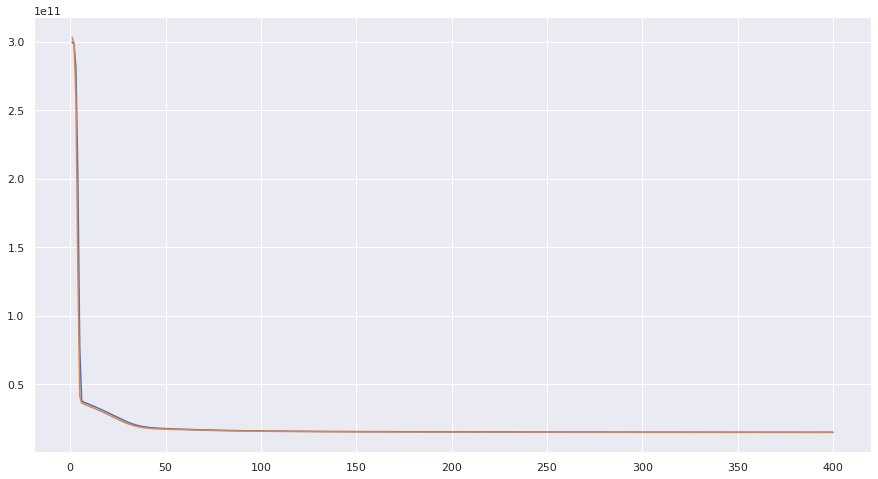

In [90]:
# Model Loss
plt.figure(figsize = (15, 8))
sns.lineplot(x = range(1, 401), y = model.history.history['loss'])
sns.lineplot(x = range(1, 401), y = model.history.history['val_loss'])

In [91]:
# Precitions
preds_for_top_3_quantile = model.predict(X_test)

#Evaluating Errors
print("MAE: {}".format(mean_absolute_error(y_test, preds_for_top_3_quantile)))
print("Explained Variance: {}".format(explained_variance_score(y_test, preds_for_top_3_quantile)))

MAE: 86673.81117438753
Explained Variance: 0.735620747819711


In [117]:
## Predicting Single House Price
single_house = df.drop('price', axis = 1).iloc[0:5]

single_house = scaler.transform(single_house.values)

model.predict(single_house).reshape(1, -1)     # to make it in column matrix

array([[272654.2 , 620564.8 , 431843.53, 422360.  , 482658.88]],
      dtype=float32)

In [112]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


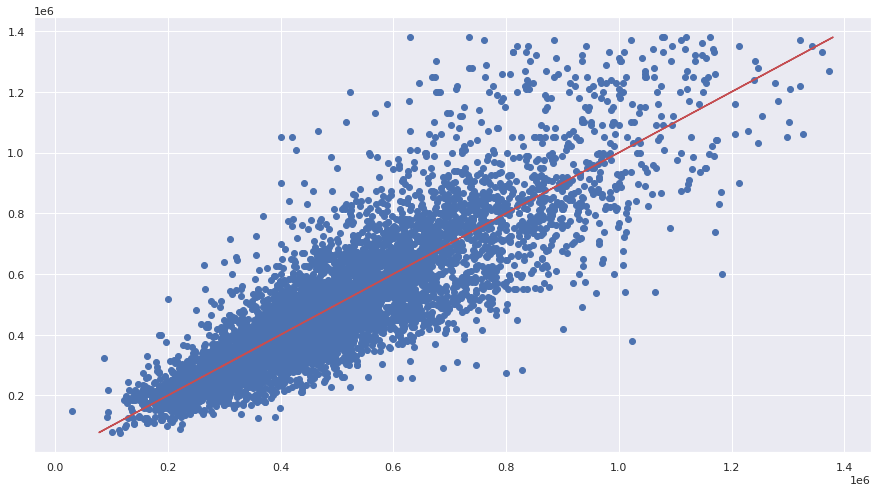

In [94]:
plt.figure(figsize = (15, 8))
plt.scatter(x = preds_for_top_3_quantile, y = y_test)
plt.plot(y_test, y_test, color = 'r')

In [95]:
quantile_97_price['price'].describe()

count    2.093400e+04
mean     4.948374e+05
std      2.363390e+05
min      7.800000e+04
25%      3.190000e+05
50%      4.430000e+05
75%      6.200000e+05
max      1.380000e+06
Name: price, dtype: float64

In [97]:
np.sqrt(mean_squared_error(y_test, preds_for_top_3_quantile))

121438.84972863308

# Results / Conclusion

**I did manage to reduce MAE by removing top 1% and then further reduce by removing top 3% of the Data. However my explained variance reduced from 0.78 to 0.73**